In [1]:
# import packages
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
#get zipcodes
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )
#get service districts, nevermind, service districts are lame

# districts = gpd.read_file('../data/Service Districts (GIS).geojson')
# print(districts.crs)
# districts.head()

EPSG:4326


,area_sq_mi,name,objectid,geometry
0,198,Urban Services District,0,"MULTIPOLYGON (((-86.68681 36.28671, -86.68706 ..."
1,327,General Services District,4,"MULTIPOLYGON (((-86.56776 36.03424, -86.56783 ..."


In [7]:
type(zipcodes)

geopandas.geodataframe.GeoDataFrame

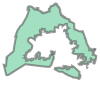

In [12]:
districts.loc[0, 'geometry']
districts.loc[1, 'geometry']

<Axes: >

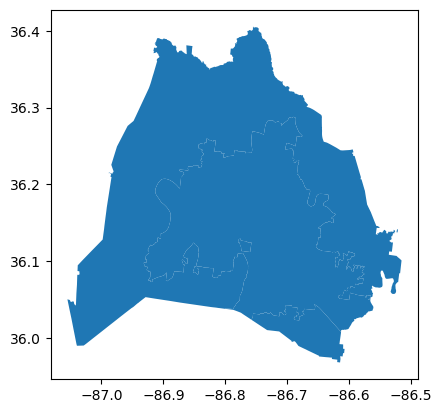

In [13]:
districts.plot()

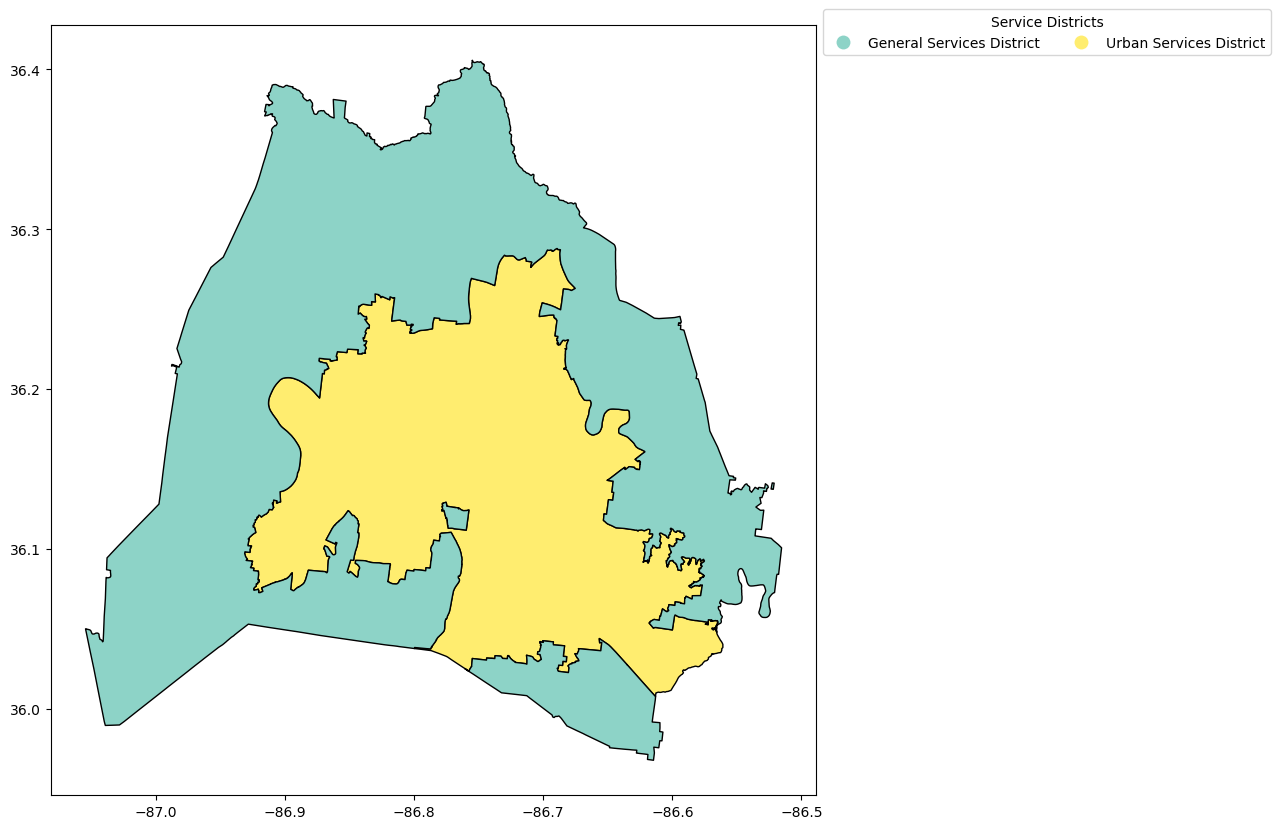

In [19]:
leg_kwds = {'title': 'Service Districts', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

districts.plot(column = 'name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()